In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
file_path = r"C:\Users\saisi\OneDrive\Documents\trying KG\ipl_2.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.replace('\ufeff', '')

In [11]:
G = nx.DiGraph()

In [13]:
for _, row in df.iterrows():
    player = row['Player']
    team = row['Team']
    opponent = row['Opponent']
    match = row['Match']
    result = row['MatchResult']
    runs = row['Runs']
    venue = row['Venue']
    role = row['Role']

    # Combine player and team into one node
    player_team = f"{player} ({team})"
    opponent_team = opponent
    G.add_node(opponent_team, type='Team')

    # Add nodes
    G.add_node(player_team, type='Player', role=role)
    G.add_node(match, type='Match')
    G.add_node(venue, type='Venue')

    # Add edges
    G.add_edge(player_team, match, relation='playedInMatch', weight=runs)
    G.add_edge(player_team, opponent_team, relation='playedAgainst')
    G.add_edge(match, venue, relation='heldAt')

    if result.strip().lower() == 'won':
        G.add_edge(player_team, match, relation='wonMatch')

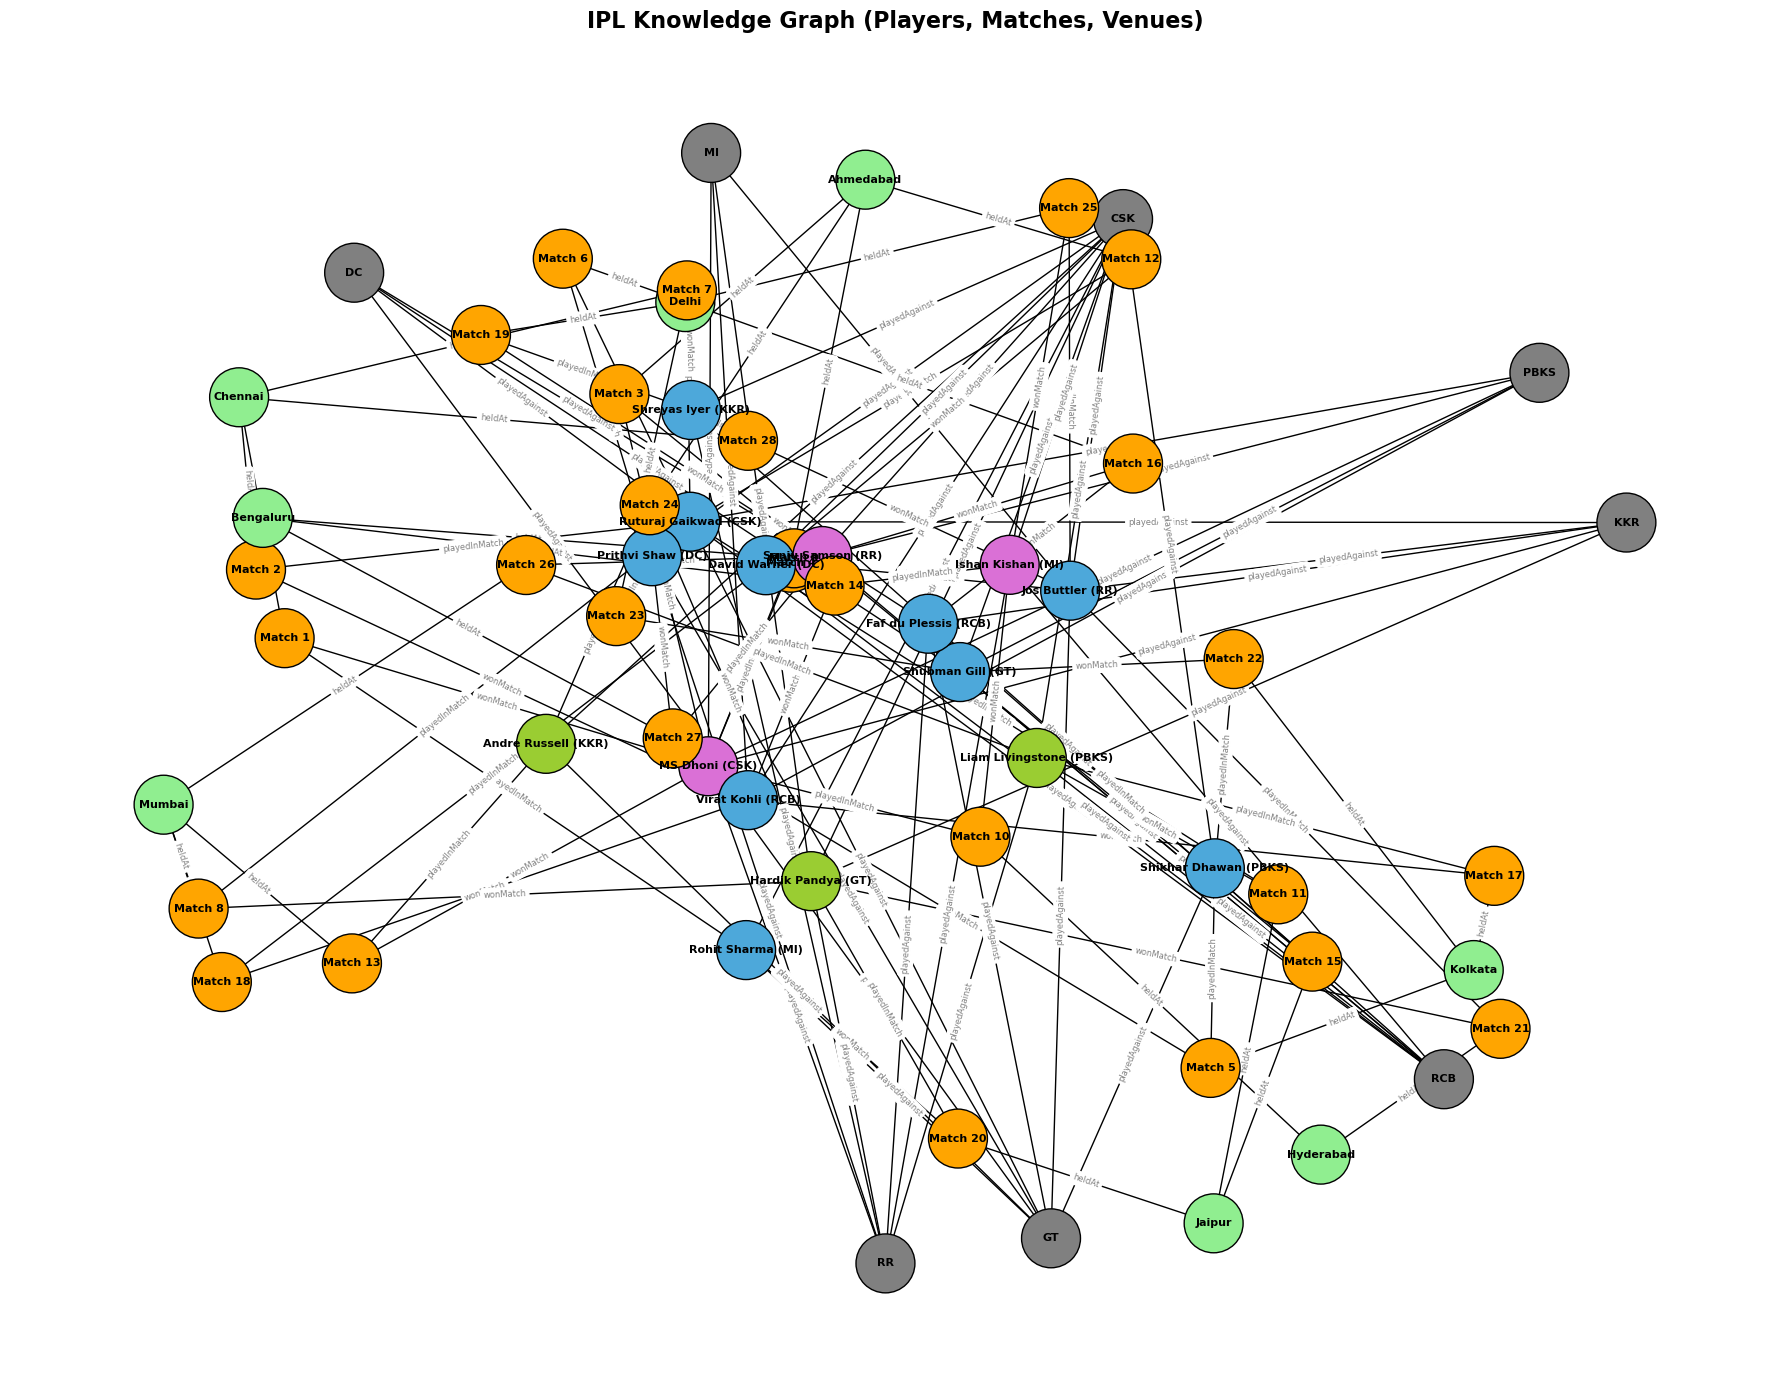

In [19]:
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, k=0.45, seed=42)

role_colors = {
    'Batsman': '#4DA8DA',
    'Bowler': '#FF7F50',
    'All-rounder': '#9ACD32',
    'Wicket-Keeper': '#DA70D6'
}

node_colors = []
for node, data in G.nodes(data=True):
    if data['type'] == 'Player':
        node_colors.append(role_colors.get(data.get('role', ''), 'gray'))
    elif data['type'] == 'Match':
        node_colors.append('orange')
    elif data['type'] == 'Venue':
        node_colors.append('lightgreen')
    else:
        node_colors.append('gray')

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1800, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, width=1)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='gray')

plt.title("IPL Knowledge Graph (Players, Matches, Venues)", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()